In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
kmeans = KMeans(init='random', n_clusters=3)
kmeans.fit(iris_df.drop('target', axis=1))
iris_df['pred']=kmeans.labels_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [6]:
iris_re = iris_df.groupby(['target', 'pred'])['sepal length (cm)'].count()
iris_re

target  pred
0       1       50
1       0        2
        2       48
2       0       36
        2       14
Name: sepal length (cm), dtype: int64

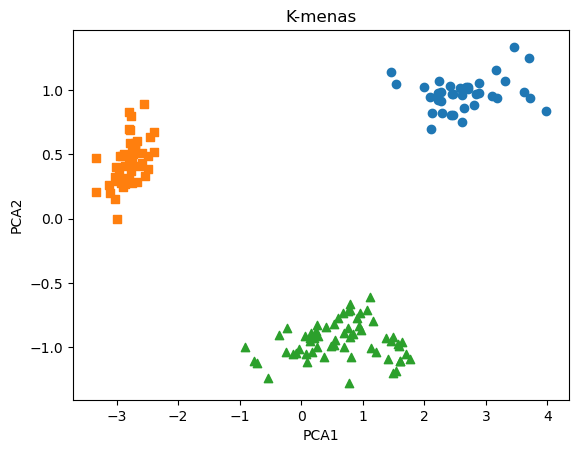

In [7]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris_df)

iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]

# 군집된 값이 0, 1, 2 인 경우, 인덱스 추출
idx_0 = iris_df[iris_df['pred'] == 0].index
idx_1 = iris_df[iris_df['pred'] == 1].index
idx_2 = iris_df[iris_df['pred'] == 2].index

# 각 군집 인덱스의 pca_x, pca_y 값 추출 및 시각화
fig, ax = plt.subplots()

ax.scatter(x=iris_df.loc[idx_0, 'pca_x'], y= iris_df.loc[idx_0, 'pca_y'], marker = 'o')
ax.scatter(x=iris_df.loc[idx_1, 'pca_x'], y= iris_df.loc[idx_1, 'pca_y'], marker = 's')
ax.scatter(x=iris_df.loc[idx_2, 'pca_x'], y= iris_df.loc[idx_2, 'pca_y'], marker = '^')
ax.set_title('K-menas')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')


plt.show()

In [8]:
import numpy as np
import pandas as pd

In [9]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [10]:
a.sum(axis=1)

array([10, 26, 42, 58])

In [11]:
a.mean(axis=1)

array([ 2.5,  6.5, 10.5, 14.5])

In [13]:
a = np.array([1, 4, 0, 2, 3, 8, 9, 7])
a[[True, False, True, False, True, True, True, False]]

array([1, 0, 3, 8, 9])